## Boolean networks code
Jupyter notebook available at [docs/notebooks/01_boolean_networks.ipynb](https://github.com/matthiaskoenig/mcp/blob/master/docs/notebooks/01_boolean_networks.ipynb)

### Short introduction to python
Most of the examples will be based on `python`. A basic understanding of programming and the python language will be sufficient to follow the examples. 

Many good basic python tutorials and introductions exist, for instance see

- https://www.learnpython.org/ -  interactive python tutorial
- https://docs.python.org/3/tutorial/index.html - official tutorial, more in depth

This tutorial and all information related to it is available online at
https://github.com/matthiaskoenig/mcp

To follow the tutorial a basic `python3` installation with the packages listed in `requirements.txt` is needed.

If you have any questions or need help please contact konigmatt@googlemail.com

### Boolean networks in a nutshell

- A boolean network consists of nodes (which have a boolean state) and connections between the states (inputs for nodes).
- The boolean states can be either 0 or 1.
- Every node (state) in the boolean network has a rule which specifies the output of the node (state) for all possible combinations of inputs. 
- Based on the given rule for a node the node state is updated.
- Simulations start from an initial state of the network. This is the state of all nodes at the begin of the simulation.

General Properties of Boolean Networks:

- Fixed topology (doesn’t change with time)
- Dynamic (states evolve over time, updates happen at discrete time steps)
- Synchronous (update of all states occurs at the same time)
- Node States: Deterministic (based on rules), discrete (binary)
- Gate Function: Boolean (rules which calculate the update for the state, return discrete new state)
- Flow: Information

For one dimensional input of a given node in a boolean network the possible unary boolean operators are

- IDENTITY (`[0]->[0], [1]->[1]`) 
- INVERSE (`[0]->[1], [1]->[0]`)
- ZERO (`[0]->[0], [1]->[0]`)
- ONE (`[0]->[1], [1]->[1]`)

For two dimensional inputs possible logical operations (rules) are for instance

- AND (`[1,1]->[1], [1,0]->[0], [0,1]->[1], [0,0]->[0]`) 
- OR
- XOR
- NOR
- ...

An overview over the truth tables (boolean rules) for unary and binary operations can be found here https://en.wikipedia.org/wiki/Truth_table

### Example 1
Within this task we will simulate a boolean network by applying the rules repeatedly starting from an intial state, thereby updating the state vector `[X1, X2]`.


<img src="./images/Example1.png" width="200"/>

* Write a computer program which simulates the simple boolean networks consisting of the two nodes `X1` and `X2` with the initial state `[X1, X2](0) = [0, 1]`. The boolean rules for updating `X1` based on the input from `X2`, and for updating X2 based on the input of `X1` are the unary `INVERSE` rule. Simulate the model for 20 steps. What is the final state of the boolean network?
* What are the possible trajectories of the boolean network, i.e. which sequence of states are possible? (hint: simulate the network for all possible initial states)

#### Simple solution
- translate problem into code (just follow the problem description)
- use what you know about the problem domain
- boolean states, discrete time evolution, synchronous updates

In [1]:
from pprint import pprint
N = 20  # number of time steps
states = [[False, True]]  # initial state
for k in range(N):
    # get state of last step
    x = states[k]
    print(f'{k:<3} : {x}')
    
    # update state by applying rules
    x_new = [not x[1], not x[0]]
    
    # store new state
    states.append(x_new)
    
print('-' * 80)
print(states)

0   : [False, True]
1   : [False, True]
2   : [False, True]
3   : [False, True]
4   : [False, True]
5   : [False, True]
6   : [False, True]
7   : [False, True]
8   : [False, True]
9   : [False, True]
10  : [False, True]
11  : [False, True]
12  : [False, True]
13  : [False, True]
14  : [False, True]
15  : [False, True]
16  : [False, True]
17  : [False, True]
18  : [False, True]
19  : [False, True]
--------------------------------------------------------------------------------
[[False, True], [False, True], [False, True], [False, True], [False, True], [False, True], [False, True], [False, True], [False, True], [False, True], [False, True], [False, True], [False, True], [False, True], [False, True], [False, True], [False, True], [False, True], [False, True], [False, True], [False, True]]


#### Analyse trajectories

Now analyse all possible states of the network. For this we have to start the network from all possible initial states.
* define recurring code as functions
* generalize solution so it can be applied to a broader application field

In [2]:
state_init = [
    [True, True],
    [True, False],
    [False, True],
    [False, False],
]

def f_example1(x):
    """Rule for single input which is inversed."""
    assert len(x) == 2
    return [not x[1], not x[0]]

def simulate(x0, f_rules, steps=10):
    """ Simulates the boolean network from initial state by applying given rules."""
    states = [x0]
    for k in range(steps):
        # synchronous updates
        x = states[k]
        states.append(f_rules(x))
    return states

# run network from all initial states
for x0 in state_init:
    states = simulate(x0, f_rules=f_example1)
    pprint(states)
    print('-' * 40)

[[True, True],
 [False, False],
 [True, True],
 [False, False],
 [True, True],
 [False, False],
 [True, True],
 [False, False],
 [True, True],
 [False, False],
 [True, True]]
----------------------------------------
[[True, False],
 [True, False],
 [True, False],
 [True, False],
 [True, False],
 [True, False],
 [True, False],
 [True, False],
 [True, False],
 [True, False],
 [True, False]]
----------------------------------------
[[False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True],
 [False, True]]
----------------------------------------
[[False, False],
 [True, True],
 [False, False],
 [True, True],
 [False, False],
 [True, True],
 [False, False],
 [True, True],
 [False, False],
 [True, True],
 [False, False]]
----------------------------------------


#### Improve solution
- use appropriate data structures (appending to a list is not very efficient; data structure which simplifies analysis)
- plot results

----------------------------------------
'x0 = [1 1]'


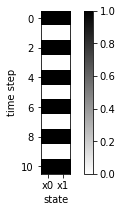

----------------------------------------
'x0 = [1 0]'


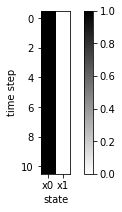

----------------------------------------
'x0 = [0 1]'


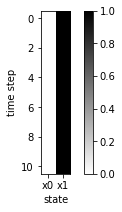

----------------------------------------
'x0 = [0 0]'


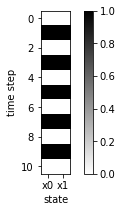

In [3]:
%matplotlib inline

import numpy as np
from matplotlib import pylab as plt

ndstate_init = [
    np.array([True, True]),
    np.array([True, False]),
    np.array([False, True]),
    np.array([False, False]),
]

def f_example1(x):
    """Inverse of given state."""
    return np.array([not x[1], not x[0]])


def ndsimulate(x0, f_rules, steps=10):
    """ Simulates the boolean network from initial state by applying given rules."""
    states = np.zeros(shape=((steps+1), x0.size), dtype=bool)
    
    print("-" * 40)
    pprint("x0 = {}".format(x0.astype(np.int)))
    states[0, :] = x0
    for k in range(steps):
        x = states[k]
        states[k+1, :] = f_rules(states[k, :])
        
    # pprint(states.astype(np.int))
    return states

def plot_states(states, figsize=(5,3), ylabel="time step"):
    """Plot the states."""
    Nt, Nx = states.shape
    fig = plt.figure(figsize=figsize)
    plt.imshow(states.astype(np.double), cmap="binary")
    plt.colorbar()
    plt.ylabel(ylabel)
    plt.xlabel("state")
    ax = plt.gca()
    ax.set_xticks(range(Nx))
    ax.set_xticklabels(['x{}'.format(k) for k in range(Nx)])
    plt.show()

for x0 in ndstate_init:
    states = ndsimulate(x0, f_rules=f_example1)
    plot_states(states)

### Example 2
<img src="./images/Example2.png" width="200"/>

* Simulate the following more complex boolean network consisting of 5 nodes (reuse the code from task 1)
* The update rules are given by

```
X1 = NOT(X4)
X5 = IDENTIY(X4)
X2 = OR(X1, X5)
X3 = OR(X1, X5)
X4 = XOR(X3, X2)
```


* What are the possible trajectories of the boolean network, i.e. which final states (or cycles of states) are reached? (hint: simulate the network for all possible initial states)

***Automatize***
* if you have to do it once, you have to do it 1000 times

In [4]:
states_init = [
    [0,0,0,0,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    ...
]

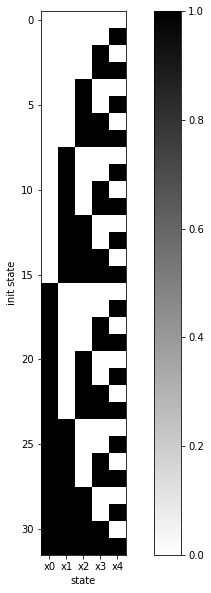

In [5]:
states_init = np.linspace(0, 31, num=32, dtype=np.uint8)  # (32,)
states_init = np.reshape(states_init, (32,1))
ndstates_init = np.unpackbits(states_init, axis=1)
ndstates_init = ndstates_init[:, 3:]
# print(ndstates_init)
plot_states(ndstates_init, figsize=(10,10), ylabel="init state")

----------------------------------------
'x0 = [0 0 0 0 0]'


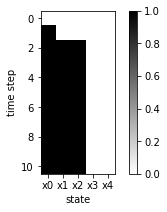

----------------------------------------
'x0 = [0 0 0 0 1]'


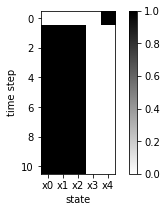

----------------------------------------
'x0 = [0 0 0 1 0]'


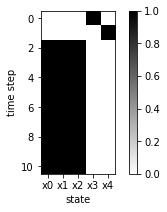

----------------------------------------
'x0 = [0 0 0 1 1]'


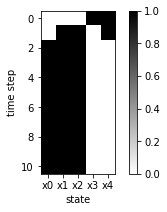

----------------------------------------
'x0 = [0 0 1 0 0]'


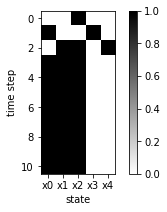

----------------------------------------
'x0 = [0 0 1 0 1]'


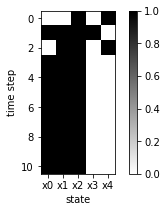

----------------------------------------
'x0 = [0 0 1 1 0]'


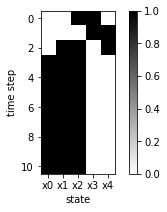

----------------------------------------
'x0 = [0 0 1 1 1]'


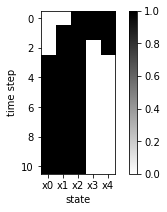

----------------------------------------
'x0 = [0 1 0 0 0]'


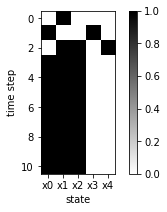

----------------------------------------
'x0 = [0 1 0 0 1]'


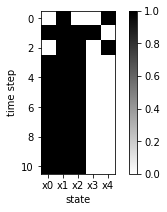

----------------------------------------
'x0 = [0 1 0 1 0]'


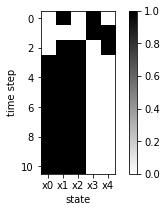

----------------------------------------
'x0 = [0 1 0 1 1]'


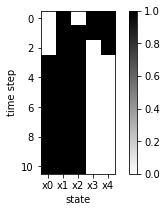

----------------------------------------
'x0 = [0 1 1 0 0]'


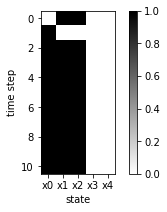

----------------------------------------
'x0 = [0 1 1 0 1]'


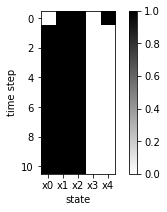

----------------------------------------
'x0 = [0 1 1 1 0]'


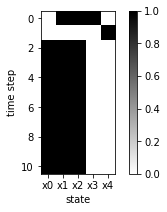

----------------------------------------
'x0 = [0 1 1 1 1]'


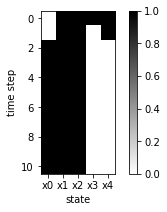

----------------------------------------
'x0 = [1 0 0 0 0]'


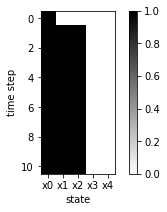

----------------------------------------
'x0 = [1 0 0 0 1]'


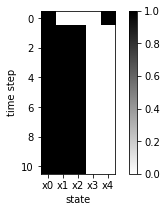

----------------------------------------
'x0 = [1 0 0 1 0]'


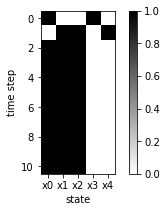

----------------------------------------
'x0 = [1 0 0 1 1]'


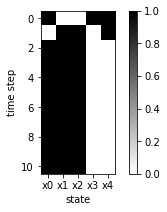

----------------------------------------
'x0 = [1 0 1 0 0]'


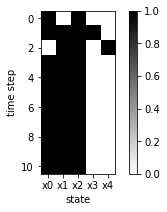

----------------------------------------
'x0 = [1 0 1 0 1]'


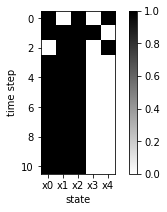

----------------------------------------
'x0 = [1 0 1 1 0]'


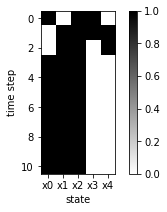

----------------------------------------
'x0 = [1 0 1 1 1]'


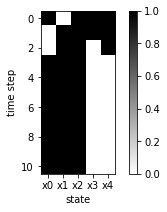

----------------------------------------
'x0 = [1 1 0 0 0]'


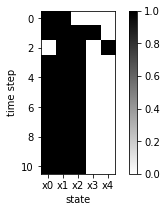

----------------------------------------
'x0 = [1 1 0 0 1]'


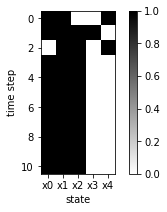

----------------------------------------
'x0 = [1 1 0 1 0]'


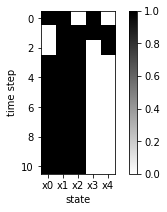

----------------------------------------
'x0 = [1 1 0 1 1]'


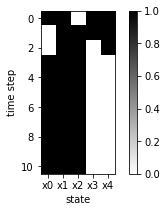

----------------------------------------
'x0 = [1 1 1 0 0]'


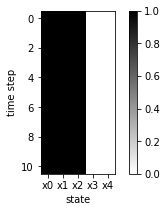

----------------------------------------
'x0 = [1 1 1 0 1]'


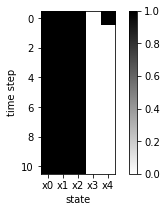

----------------------------------------
'x0 = [1 1 1 1 0]'


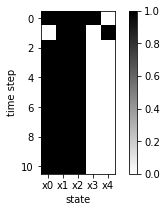

----------------------------------------
'x0 = [1 1 1 1 1]'


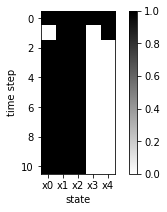

In [6]:
def f_task2(x):
    """
    X0 = INVERSE(X3)
    X4 = IDENTIY(X3)
    X1 = OR(X0, X4)
    X2 = OR(X0, X4)
    X3 = XOR(X2, X1)
    """
    y = np.zeros_like(x)
    y[0] = np.invert(x[3])
    y[4] = x[3]
    y[1] = x[0] or x[4]
    y[2] = x[0] or x[4]
    
    # xor hack
    y[3] = x[2] or x[1]
    if (x[2] and x[1]):
        y[3] = False
    
    return y

for x0 in ndstates_init:
    states = ndsimulate(x0, f_rules=f_task2)
    plot_states(states)

In [7]:
### Trajectory graph
# TODO: see https://plot.ly/python/network-graphs/



In [8]:
def ndsimulate(x0, f_rules, steps=10):
    """ Simulates the boolean network from initial state by applying given rules."""
    states = np.zeros(shape=((steps+1), x0.size), dtype=bool)
    
    print("-" * 40)
    pprint("x0 = {}".format(x0.astype(np.int)))
    states[0, :] = x0
    for k in range(steps):
        x = states[k]
        states[k+1, :] = f_rules(states[k, :])
        
    # pprint(states.astype(np.int))
    return states